In [1]:
import keras
import keras.backend as K
import tensorflow as tf
import numpy as np

import utils
import loggingreporter 

cfg = {}
cfg['SGD_BATCHSIZE']    = 256
cfg['SGD_LEARNINGRATE'] = 0.0004
cfg['NUM_EPOCHS']       = 10000
cfg['FULL_MI']          = True

# cfg['ACTIVATION'] = 'tanh'
cfg['ACTIVATION'] = 'relu'
# cfg['ACTIVATION'] = 'softsign'
# cfg['ACTIVATION'] = 'softplus'

# How many hidden neurons to put into each of the layers
cfg['LAYER_DIMS'] = [10,7,5,4,3] # original IB network
ARCH_NAME =  '-'.join(map(str,cfg['LAYER_DIMS']))

trn, tst = utils.get_IB_data('2017_12_21_16_51_3_275766')

# Where to save activation and weights data
cfg['SAVE_DIR'] = 'rawdata/' + cfg['ACTIVATION'] + '_' + ARCH_NAME 

Using TensorFlow backend.


In [2]:
input_layer = keras.layers.Input((trn.X.shape[1],))
clayer = input_layer
for n in cfg['LAYER_DIMS']:
    clayer = keras.layers.Dense(n, 
                                activation=cfg['ACTIVATION'],
                                kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=1/np.sqrt(float(n)), seed=None),
                                bias_initializer='zeros'
                               )(clayer)
output_layer = keras.layers.Dense(trn.nb_classes, activation='softmax')(clayer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)
optimizer = keras.optimizers.TFOptimizer(tf.train.AdamOptimizer(learning_rate=cfg['SGD_LEARNINGRATE']))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

W0718 06:15:21.125551 140316231358272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 06:15:21.147649 140316231358272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 06:15:21.158531 140316231358272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0718 06:15:21.266125 140316231358272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 06:15:21.296886 140316231358272 de

In [3]:
def do_report(epoch):
    # Only log activity for some epochs.  Mainly this is to make things run faster.
    if epoch < 20:       # Log for all first 20 epochs
        return True
    elif epoch < 100:    # Then for every 5th epoch
        return (epoch % 5 == 0)
    elif epoch < 2000:    # Then every 10th
        return (epoch % 20 == 0)
    else:                # Then every 100th
        return (epoch % 100 == 0)
    
reporter = loggingreporter.LoggingReporter(cfg=cfg, 
                                          trn=trn, 
                                          tst=tst, 
                                          do_save_func=do_report)
r = model.fit(x=trn.X, y=trn.Y, 
              verbose    = 0, 
              batch_size = cfg['SGD_BATCHSIZE'],
              epochs     = cfg['NUM_EPOCHS'],
              # validation_data=(tst.X, tst.Y),
              callbacks  = [reporter,])

print("Finished.")

W0718 06:15:21.485228 140316231358272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Making directory rawdata/relu_10-7-5-4-3


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:99: UserWarning: Method on_batch_begin() is slow compared to the batch update (0.141204). Check your callbacks.
  % delta_t_median)


Finished.


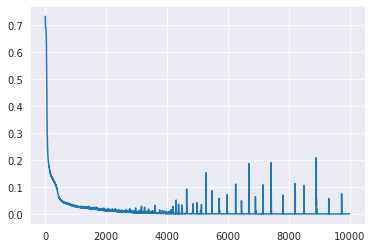

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.plot(r.history['loss'])